In [1]:
from autograd_from_scratch import *
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

### Task: Classification

Learn an image by classifying points as black or white

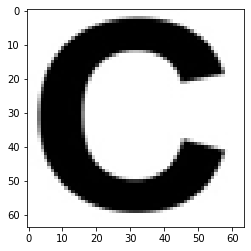

In [2]:
image_size = (64, 64)
image = Image.open("./assets/C.jpg")
image = ImageOps.grayscale(image).resize(image_size)
image = np.asarray(image)
plt.imshow(image, cmap='gray')

In [3]:
def generate_training_example(batch_size):
    num_classes = 2
    idx = np.random.randint((0, 0), image.shape, (batch_size, num_classes))
    pixel_values = image[idx[:, 0], idx[:, 1]]
    labels = np.where(pixel_values > 127, 0, 1)
    one_hot_matrix = np.eye(num_classes)
    return idx, one_hot_matrix[labels]

In [4]:
model = Sequential([
    Layer(2, 20),
    Sigmoid(),
    Layer(20, 20),
    Sigmoid(),
    Layer(20, 20),
    ReLU(),
    Layer(20, 2),
    Softmax()
],
criterion=MSELoss(),
optimizer=Adam(lr=0.05))

In [5]:
xv, yv = np.meshgrid(np.linspace(0, image_size[0] - 1, image_size[0]), np.linspace(0, image_size[1] - 1, image_size[1]))
grid = np.stack([yv.flatten(), xv.flatten()], axis=1)

In [6]:
# If GENERATE_ANIMATION is true, the network generates predictions
# over the whole image after FRAME_FREQUENCY batch, taking quite a while.
FRAME_FREQUENCY = 500
GENERATE_ANIMATION = False

In [7]:
from tqdm import tqdm

batch_size = 64
data = [generate_training_example(batch_size) for _ in range(image_size[0] * image_size[1] * 10)]
losses = []
images = []
for batch_num, data_ex in tqdm(enumerate(data)):
    x, y = data_ex
    model_out = model.forward(x)
    loss = model.calculate_loss(y, model_out)
    model.backward()
    model.optimizer.step()
    losses.append(np.log(loss))

    if GENERATE_ANIMATION and (batch_num + 1) % FRAME_FREQUENCY == 0:
        curr_image_prediction = np.argmin(model.forward(grid), axis=1).reshape(image_size)
        images.append(curr_image_prediction)

40960it [00:19, 2093.00it/s]


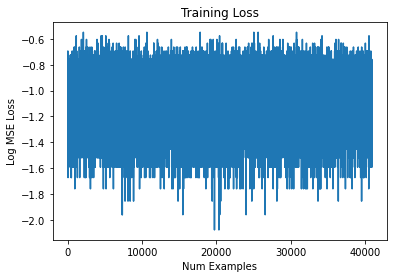

In [8]:
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Num Examples")
plt.ylabel("Log MSE Loss")
plt.show()

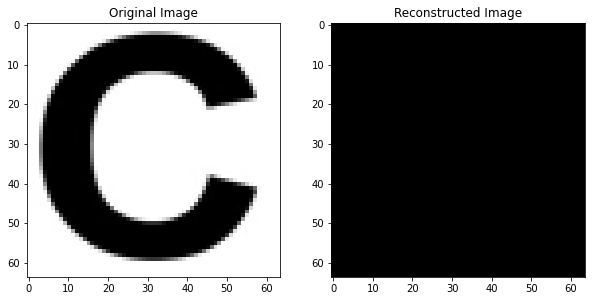

In [9]:
final_prediction = np.argmin(model.forward(grid), axis=1).reshape(image_size)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(final_prediction, cmap='gray')

IndexError: list index out of range

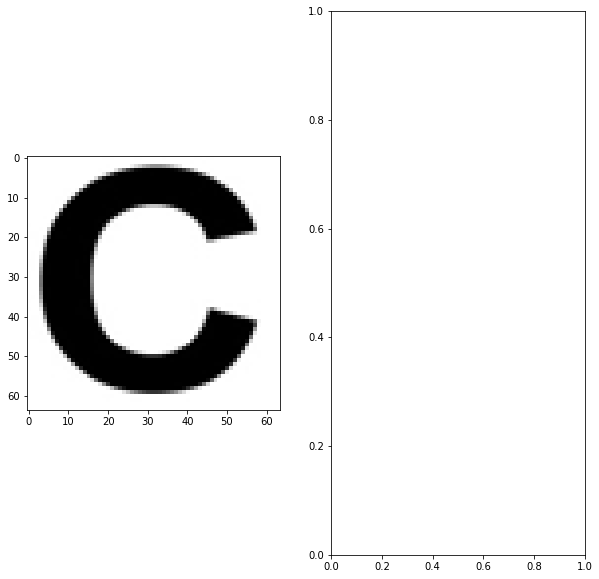

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

frames = images
def init():
    im.set_data(frames[0])
    return [im]

def update(i):
    im.set_data(frames[i])
    return [im]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(image, cmap='gray')
im = ax2.imshow(frames[0], cmap='gray', vmin=0, vmax=1)

ani = FuncAnimation(fig, update, frames=len(frames), init_func=init, blit=True)

HTML(ani.to_jshtml())